In [1]:
import platform
import sys
from pathlib import Path
from datetime import datetime

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
if platform.system() != 'Windows':
    venv_dir = Path("~/.local/share/virtualenvs/book_tracking-9mbICq0s/lib/python3.8/site-packages").expanduser().absolute()
    parent_dir = Path(".").absolute().parent
    venv_executable = Path("~/.local/share/virtualenvs/book_tracking-9mbICq0s/bin/python3.8").expanduser().absolute()
    if str(venv_dir) not in sys.path:
        sys.path.append(str(venv_dir))
    if str(parent_dir) not in sys.path:
        sys.path.append(str(parent_dir))
    if sys.executable != str(venv_executable):
        sys.executable = str(venv_executable)

In [3]:
from GoogleConnection.QueryService import queryService

In [4]:
f_books = queryService.query_sheet("f_books")

f_read_stats = queryService.query_sheet("f_read_stats")

In [24]:
f_books_types = {
    "book_id": "int32",
    "title": "string",
    "pages": "int32",
    "duration": "int32",
    "year": "int16",
    "format": "string",
    "genre": "string",
    "f_nf": "string",
    "author": "string",
    "other_authors": "string",
    "imprint": "string",
    "publishing_house": "string",
    "illustrator": "string",
    "narrator": "string",
    "translator": "string",
    "source": "string",
    "price": "float64"
}

f_read_stats_types = {
    "book_id": "int32",
    "rating": "int8"
}

In [25]:
f_books_df = pd.DataFrame(f_books["data"], columns=f_books["columns"]).astype(f_books_types, errors="ignore")
f_books_df["purchase_date"] = pd.to_datetime(f_books_df["purchase_date"])
f_books_df["price"] = np.around(f_books_df["price"], 2)

In [26]:
f_books_df

,book_id,title,pages,duration,year,format,genre,f_nf,author,other_authors,imprint,publishing_house,illustrator,narrator,translator,source,price,purchase_date
0,1,Uzumaki,656,0,2000,gn,horror,f,Junji Ito,Yuji Oniki,Viz Media,Viz Media,Junji Ito,,,Right Stuf Anime,20.99,2017-05-15
1,2,The Shallows: What the Internet Is Doing to Ou...,280,0,2010,paperback,technology,nf,Nicholas Carr,,Norton,W. W. Norton,,,,Amazon,0.00,2018-08-20
2,3,The Sixth Extinction: An Unnatural History,336,0,2014,hardcover,nature,nf,Elizabeth Kolbert,,Henry Holt,Macmillan,<NA>,<NA>,<NA>,<NA>,NaN,NaT
3,4,The Name of the Wind (The Kingkiller Chronicle...,662,0,2007,hardcover,fantasy,f,Patrick Rothfuss,,DAW,Penguin Random House,,,,Amazon,20.99,2018-09-16
4,5,"The Wise Man's Fear (The Kingkiller Chronicle,...",994,0,2011,hardcover,fantasy,f,Patrick Rothfuss,,DAW,Penguin Random House,,,,Amazon,20.99,2018-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,846,Call of the Night (Volume 3),208,,2021,gn,fantasy,f,Kotoyama,,Viz Media,Viz Media,Kotoyama,,Junko Goda,Bookshop.org,9.29,2022-08-04
796,847,The Mechanical Horse,166,,2016,hardcover,general_nonfiction,nf,Margaret Guroff,,University of Texas Press,University of Texas Press,,,,Illiad Bookstore,5.42,2022-08-20
797,848,Parable of the Sower,329,,2019,paperback,fantasy,f,Octavia E. Butler,,Grand Central Publishing,Hachette,,,,Skylight Books,16.99,2022-08-21
798,849,Two Wheels Good,334,,2022,hardcover,general_nonfiction,nf,Jody Rosen,,Crown,Penguin Random House,,,,Skylight Books,28.99,2022-08-21


In [27]:
f_books_df[f_books_df["price"].isna()]

,book_id,title,pages,duration,year,format,genre,f_nf,author,other_authors,imprint,publishing_house,illustrator,narrator,translator,source,price,purchase_date
2,3,The Sixth Extinction: An Unnatural History,336,0,2014,hardcover,nature,nf,Elizabeth Kolbert,,Henry Holt,Macmillan,<NA>,<NA>,<NA>,<NA>,NaN,NaT
7,8,Great Tales of Horror,600,0,1991,hardcover,horror,f,H.P. Lovecraft,,Barnes & Noble,Barnes & Noble,<NA>,<NA>,<NA>,<NA>,NaN,NaT
11,12,AIDS: Science and Society,248,0,1995,paperback,nature,nf,Hung Y. Fan,"Ross F. Conner, Luis P. Villarreal","Jones and Bartlett Publishers, Inc",Ascend Learning,<NA>,<NA>,<NA>,<NA>,NaN,NaT
20,21,"Day of the Dragon (WarCraft, #1)",378,0,2001,paperback,fantasy,f,Richard A. Knaak,,Pocket Books,Simon & Schuster,<NA>,<NA>,<NA>,<NA>,NaN,NaT
22,23,"The Fifth Season (The Broken Earth, #1)",468,0,2015,paperback,fantasy,f,N.K. Jemisin,,Orbit,Hachette,<NA>,<NA>,<NA>,<NA>,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,656,Edgedancer,265,,2017,hardcover,fantasy,f,Brandon Sanderson,,Tor,Macmillan,<NA>,<NA>,<NA>,<NA>,NaN,NaT
660,661,Redwood (The Familiar #5),880,,2017,paperback,fantasy,f,Mark Z. Danielewski,,Pantheon,Knopf Doubleday,<NA>,<NA>,<NA>,<NA>,NaN,NaT
661,662,Hit Makers,307,,2017,hardcover,general_nonfiction,nf,Derek Thompson,,Penguin,Penguin Random House,<NA>,<NA>,<NA>,<NA>,NaN,NaT
662,663,Anansi Boys,303,,2005,hardcover,fantasy,f,Neil Gaiman,,HarperCollins,HarperCollins,<NA>,<NA>,<NA>,<NA>,NaN,NaT


In [28]:
# All started/finished reads
f_read_stats_df = pd.DataFrame(f_read_stats["data"], columns=f_read_stats['columns']).astype(f_read_stats_types, errors='ignore')
f_read_stats_df["started"] = pd.to_datetime(f_read_stats_df["started"])
f_read_stats_df["finished"] = pd.to_datetime(f_read_stats_df["finished"])

# Completed_reads
completed_reads = f_read_stats_df[f_read_stats_df["finished"].notna()].copy()
completed_reads["month_read"] = completed_reads["finished"].dt.month_name().astype("string")
completed_reads["year_read"] = completed_reads["finished"].dt.year.astype("int16")
completed_reads["days_to_finish"] = (completed_reads["finished"] - completed_reads["started"]).dt.days

# Unfinished_reads
dnf_reads = f_read_stats_df[f_read_stats_df["finished"].isna()][["book_id", "started"]].copy()
dnf_reads["month_started"] = dnf_reads["started"].dt.month_name().astype("string")
dnf_reads["year_started"] = dnf_reads["started"].dt.year.astype("int16")

# Purchases
purchases = f_books_df[f_books_df["price"].notna()].copy()

In [10]:
all_books = pd.merge(
    f_books_df,
    completed_reads,
    on="book_id",
    how="inner"
)

In [11]:
books = all_books[all_books["year_read"] >= 2015].copy()

In [12]:
def make_timeline():
    """Creates a custom axes to order the matplotlib visuals on"""
    month_order = [
        "January", "February", "March",
        "April", "May", "June",
        "July", "August", "September",
        "October", "November", "December"
    ]
    time_order = []
    for year in [str(year) for year in range(2015, datetime.today().year + 1)]:
        for month in month_order:
            time_order.append(month + " " + year)
    return time_order

def add_timeline(df):
    """Adds the timeline to df as a categorical variable"""
    timeline = make_timeline()
    df_timeline = df.copy()
    missing = ["August 2019", "September 2019", "November 2019", "November 2017"]
    
    keys = df_timeline["month_read"] + " " + df_timeline["year_read"].astype("str")
    
    df_timeline["timeline"] = pd.Categorical(
        keys,
        [key for key in timeline if key in np.append(keys.values, missing)],
        ordered=True
    )
    return df_timeline.sort_values(by="timeline")

def format_grouped_by_date(df, col, estimator):
    """Creates a grouped df with values aggregated on the passed value 'estimator'"""
    methods = {
        "count": pd.Series.count, 
        "mean": pd.Series.mean, 
        "max": pd.Series.max
    }
    return (
        add_timeline(df)[[col, "timeline"]]
        .groupby("timeline")[col]
        .apply(methods[estimator])
        .reset_index()
    )

def books_over_time(df, ax=None, show=False, pdf=None):
    """Plots the number of books read over time"""
    
    books_over_time = format_grouped_by_date(df, "title", "count")
    timeline = books_over_time["timeline"]
    x_vals = [label if label.startswith("January") else "" for label in timeline]
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(18,8))
    
    ax.plot(timeline, books_over_time["title"], marker="o")
    plt.xticks(range(len(x_vals)), x_vals, rotation=65, ha="right")
    plt.title("Number of Books Over Time")
    plt.xlabel("")
    plt.ylabel("Number of Books")
    plt.axhline(
        np.mean(books_over_time["title"]),
        label="Average books in a month: " + str(np.ceil(np.mean(books_over_time["title"]))),
        color="orange"
    )
    plt.axvline("October 2018", label="Move to Nor Cal", color="red", linestyle="--")
    plt.axvline("August 2020", label="Move to Missouri", color="orange", linestyle="--")
    plt.axvline("June 2017", label="Graduated From UCI", color="violet", linestyle="--")
    plt.axvline("July 2021", label="Move Back to California", color="teal", linestyle="--")
    plt.legend(loc=3)
    
    if pdf:
        pdf.savefig(bbox_inches="tight")
        plt.close("all")
    if show:
        plt.show()

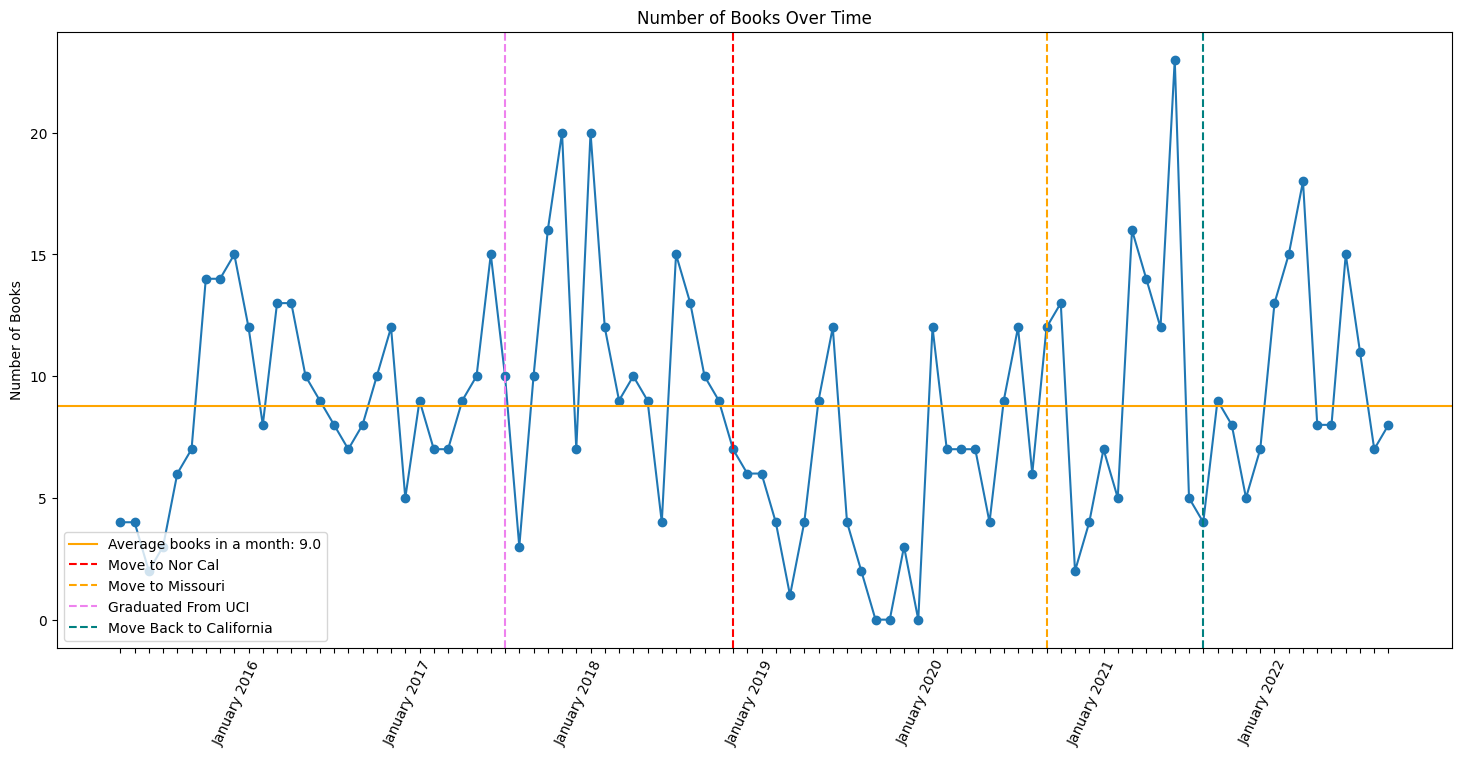

In [13]:
books_over_time(books,  show=True)